In [28]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [6]:
root='/Users/laura/Documents/FidelIA/'

In [19]:
data=pd.read_csv(root+'auto_breakdown_sample.csv')
data['DATE_SINISTRE']=pd.to_datetime(data['DATE_SINISTRE'])

In [ ]:
data.info()

In [36]:
data.sort_values('DATE_SINISTRE').tail()

,IDENTIFIANT,DATE_HEURE_OUVERTURE,CODE_EVENEMENT,DATE_SINISTRE,COMMUNE_SINISTRE,CODE_POSTAL_SINISTRE,DEPARTEMENT_SINISTRE,PAYS_SINISTRE,DISTANCE_DOMICILE_SINSITRE,AGE,MARQUE,CODE_POSTAL_ASSURE,DEPARTEMENT_ASSURE,PAYS_ASSURE,VEH_MARQUE,VEH_MODELE,VEH_DATE_MISE_CIRCULATION,VEH_CODE_CARBURANT,VEH_GENRE,VEH_TYPE_BOITE,VEJH_TYPE_TRANSMMISSION,VEH_KILOMETRAGE,VEH_HAUTEUR,VEH_LONGUEUR,VEH_LARGEUR,VEH_EMPATTEMENT,VEH_CATEGORIE,VEH_POID_A_VIDE,VEH_CATEGORIE_PTAC,DATE_HEURE_PRISE_EN_CHARGE,NATURE_PANNE,CATEGORIE_PANNE,DATE_HEURE_SINISTRE,TEMPERATURE,HUMIDITE,VITESSE_VENT,PRECIPITATIONS,PRESSION,ETAT_SOL,HAUTEUR_COUCHE_NEIGE
22,vJCtdJKYEcBS,2024-01-27 10:22:00,PA,2024-01-27,ST-GERMAIN-DU-PUY,18390.0,18.0,33,8,NaN,GMF,18220.0,18.0,33.0,FIA,TIPO,30/11/2017,E,VL,MAN,AV,51164.0,1.50,4.53,1.79,2.64,1.0,1150.0,1,2024-01-27 11:08:00,222,PNEU,2024-01-27 10:53:00,3.5,86.0,3.0,0.0,101520.0,NaN,0.0
64,3gcfPPw3Bzv0,2024-01-28 16:57:00,PA,2024-01-28,MONTECH,82700.0,82.0,33,24,NaN,GMF,82350.0,82.0,33.0,REN,TRAFIC,06/12/2007,D,UT,NaN,NaN,NaN,NaN,5.18,1.90,3.50,1.0,1874.0,2,2024-01-30 12:22:00,124,ALUM,2024-01-28 16:42:00,13.2,73.0,10.3,0.0,100890.0,0.0,0.0
88,3L0xyAfzqlWp,2024-01-31 08:52:00,PA,2024-01-31,RUEIL-MALMAISON,92500.0,92.0,33,1,42.0,MAAF,92500.0,92.0,33.0,PIA,MP3,23/10/2007,E,MO,AUT,AV,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2024-01-31 09:51:00,219,SUSP,2024-01-31 09:36:00,8.1,88.0,4.5,0.0,102380.0,0.0,0.0
24,rKmB2ifxdaFk,2024-02-03 16:32:00,PA,2024-02-03,ST-GERMAIN-LAPRADE,43700.0,43.0,33,1,92.0,MAAF,43700.0,43.0,33.0,VWG,GOLF V,10/06/2004,D,VL,SEQ,AV,NaN,1.47,4.20,1.76,2.58,1.0,1351.0,2,2024-02-05 09:17:00,131,REFR,2024-02-03 16:17:00,-2.5,89.0,1.1,0.0,93520.0,0.0,0.0
85,NPMLm78c53tJ,2024-02-19 14:41:00,PA,2024-02-19,STE-BARBE,57640.0,57.0,33,1,NaN,GMF,57640.0,57.0,33.0,PEU,3008,01/03/2021,E,VL,AUT,AV,NaN,1.62,4.45,1.84,2.68,NaN,1320.0,2,2024-02-21 09:10:00,167,MOT,2024-02-19 14:26:00,10.7,83.0,5.0,0.0,98910.0,NaN,0.0


<Axes: xlabel='DATE_SINISTRE'>

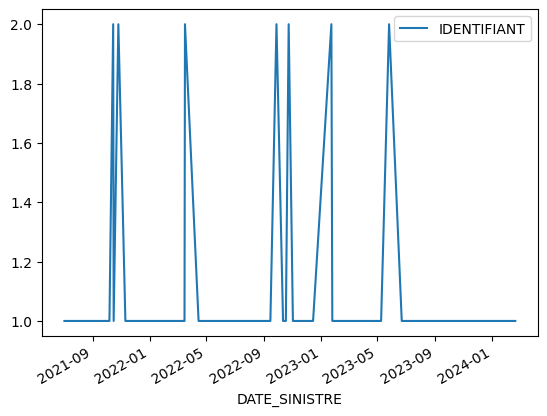

In [44]:
data.groupby(['DATE_SINISTRE']).agg({'IDENTIFIANT': 'count'}).reset_index().plot(x='DATE_SINISTRE', y='IDENTIFIANT')

In [40]:
data.isnull().mean(axis=0)*100

IDENTIFIANT                    0.0
DATE_HEURE_OUVERTURE           0.0
CODE_EVENEMENT                 0.0
DATE_SINISTRE                  0.0
COMMUNE_SINISTRE               0.0
CODE_POSTAL_SINISTRE           0.0
DEPARTEMENT_SINISTRE           0.0
PAYS_SINISTRE                  0.0
DISTANCE_DOMICILE_SINSITRE     0.0
AGE                           57.0
MARQUE                         0.0
CODE_POSTAL_ASSURE             0.0
DEPARTEMENT_ASSURE             0.0
PAYS_ASSURE                    0.0
VEH_MARQUE                     0.0
VEH_MODELE                     0.0
VEH_DATE_MISE_CIRCULATION      0.0
VEH_CODE_CARBURANT             2.0
VEH_GENRE                      0.0
VEH_TYPE_BOITE                20.0
VEJH_TYPE_TRANSMMISSION       15.0
VEH_KILOMETRAGE               45.0
VEH_HAUTEUR                   33.0
VEH_LONGUEUR                  31.0
VEH_LARGEUR                   31.0
VEH_EMPATTEMENT               32.0
VEH_CATEGORIE                 41.0
VEH_POID_A_VIDE               27.0
VEH_CATEGORIE_PTAC  

### Correlation

In [15]:
corr = data.select_dtypes(include='number').corr('pearson')

In [18]:
corr['NATURE_PANNE'].round(2).sort_values()

AGE                          -0.30
VEH_CATEGORIE                -0.09
VEH_HAUTEUR                  -0.08
VEH_EMPATTEMENT              -0.07
VEH_LONGUEUR                 -0.06
ETAT_SOL                     -0.05
VEH_LARGEUR                  -0.01
VITESSE_VENT                 -0.01
VEH_POID_A_VIDE              -0.00
HUMIDITE                     -0.00
VEH_KILOMETRAGE               0.01
DISTANCE_DOMICILE_SINSITRE    0.01
CODE_POSTAL_SINISTRE          0.03
DEPARTEMENT_SINISTRE          0.04
PRESSION                      0.05
CODE_POSTAL_ASSURE            0.08
DEPARTEMENT_ASSURE            0.08
VEH_CATEGORIE_PTAC            0.10
TEMPERATURE                   0.16
PRECIPITATIONS                0.16
NATURE_PANNE                  1.00
PAYS_SINISTRE                  NaN
PAYS_ASSURE                    NaN
HAUTEUR_COUCHE_NEIGE           NaN
Name: NATURE_PANNE, dtype: float64

In [45]:
data.groupby('CATEGORIE_PANNE').agg({'CATEGORIE_PANNE':'count' })

,CATEGORIE_PANNE
CATEGORIE_PANNE,
ALUM,8
BOIT,8
DEM,43
ECHAP,1
FREIN,1
HOMO,4
MOT,12
PNEU,14
REFR,5
